In [4]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries installed!')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries installed!


In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
import json

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim
import geocoder
import folium
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
print('Libraries imported!')

Libraries imported!


ETL

In [6]:
data = requests.get("https://www.zumper.com/blog/mapped-san-francisco-neighborhood-rent-prices-summer-2019/").text

soup = BeautifulSoup(data, 'html.parser')
print(soup.prettify())


<!DOCTYPE html >
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://www.zumper.com/blog/xmlrpc.php" rel="pingback"/>
  <meta content="https://zumpermedia.s3.amazonaws.com/blog/wp-content/uploads/2019/06/13161344/SanFrancisco_MonthlyPriceMedianMap_Summer2019.png" property="og:image">
   <link href="https://www.zumper.com/blog/wp-content/uploads/2018/09/favicon.ico" rel="icon" type="image/png"/>
   <title>
    Mapped: San Francisco Neighborhood Rent Prices (Summer 2019)
   </title>
   <link data-minify="1" href="https://www.zumper.com/blog/wp-content/cache/min/1/eb93be51e009750ec7dd824c8d35afc5.css" rel="stylesheet">
    <meta content="Check out San Francisco one-bedroom rents broken down by neighborhood on our Summer 2019 rent map 

In [7]:
nlist = []
plist = []


In [8]:
for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0):
        nlist.append(cells[0].text)
        plist.append(cells[1].text)
        

In [9]:
sf = pd.DataFrame({"Neighborhood": nlist,
                    "Price": plist
                           })

sf

,Neighborhood,Price
0,Alamo Square,"$3,600"
1,Bayview,"$2,550"
2,Bernal Heights,"$3,040"
3,Buena Vista/Ashbury Heights,"$3,600"
4,Castro,"$3,540"
5,Civic Center,"$3,380"
6,Cole Valley,"$3,000"
7,Cow Hollow,"$3,650"
8,Downtown,"$3,270"
9,Financial District,"$3,740"


Getting the list of SF neighborhoods from Wikipedia using BeatifulSoup HTML library.

In [10]:

data = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco").text

soup = BeautifulSoup(data, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighborhoods in San Francisco - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"445c1408-3a17-4f7c-84c2-b122d43b1d5e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_San_Francisco","wgTitle":"List of neighborhoods in San Francisco","wgCurRevisionId":967903178,"wgRevisionId":967903178,"wgArticleId":1487556,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","Webarchive template archiveis links","We

In [11]:
neighborhoodList = []

for row in soup.find_all( "div", class_="tocright")[0].findAll("a"):
    neighborhoodList.append(row.text)

sf_df = pd.DataFrame({"Neighborhood": neighborhoodList})

sf_df


,Neighborhood
0,1 Alamo Square
1,2 Anza Vista
2,3 Ashbury Heights
3,4 Balboa Park
4,5 Balboa Terrace
5,6 Bayview
6,7 Belden Place
7,8 Bernal Heights
8,9 Buena Vista
9,10 Butchertown (Old and New)


In [12]:
sf_df.shape

(123, 1)

In [13]:

def get_latlng(neighborhood):
    
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, San Francisco, United States of America'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [14]:
coords = [ get_latlng(neighborhood) for neighborhood in sf_df["Neighborhood"].tolist() ]


In [15]:
coords

[[37.77722000000006, -122.43145999999996],
 [37.78048000000007, -122.44357999999994],
 [37.76467000000008, -122.44586999999996],
 [37.72493000000003, -122.44313999999997],
 [37.73180000000008, -122.46739999999994],
 [37.73345000000006, -122.38997999999998],
 [37.79090375067028, -122.40376034592448],
 [37.73903000000007, -122.41620999999998],
 [37.76888336163275, -122.43835164115626],
 [37.777120000000025, -122.41963999999996],
 [37.769952019569445, -122.43615601325229],
 [37.777120000000025, -122.41963999999996],
 [37.731567379827034, -122.4291655833967],
 [37.77609000000007, -122.39374999999995],
 [37.795390000000054, -122.40811999999994],
 [37.77863000000008, -122.41682999999995],
 [37.76161662329307, -122.449349133496],
 [37.76532000000003, -122.44986999999998],
 [37.763640000000066, -122.44038999999998],
 [37.79825000000005, -122.43572999999998],
 [37.71088000000003, -122.43769999999995],
 [37.77869000000004, -122.39333999999997],
 [37.74432000000007, -122.44270999999998],
 [37.759

In [16]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])


sf_df['Latitude'] = df_coords['Latitude']
sf_df['Longitude'] = df_coords['Longitude']

print(sf_df.shape)
sf_df

(123, 3)


,Neighborhood,Latitude,Longitude
0,1 Alamo Square,37.777220,-122.431460
1,2 Anza Vista,37.780480,-122.443580
2,3 Ashbury Heights,37.764670,-122.445870
3,4 Balboa Park,37.724930,-122.443140
4,5 Balboa Terrace,37.731800,-122.467400
5,6 Bayview,37.733450,-122.389980
6,7 Belden Place,37.790904,-122.403760
7,8 Bernal Heights,37.739030,-122.416210
8,9 Buena Vista,37.768883,-122.438352
9,10 Butchertown (Old and New),37.777120,-122.419640


Getting the latitude and longitude coordinates of each SF neighborhood using Geocoder.

In [17]:

address = "San Francisco"

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco, United States of America {}, {}.'.format(latitude, longitude))

map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, neighborhood in zip(sf_df['Latitude'], sf_df['Longitude'], sf_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sf)  
    
map_sf

The geograpical coordinate of San Francisco, United States of America 37.7790262, -122.4199061.


In [18]:
sf_df.to_csv("sf_df.csv", index=False)
map_sf.save('map_sf.html')

Using the Foursquare api to find the top 10 most popular venues for each SF neighborhood.

In [19]:
CLIENT_ID = 'KC4DMRTVJYPQEK10V1SXX131EVI5Y33D5Z30MAEO34WOLRL4' 
CLIENT_SECRET = 'AAQKAR2I20I2H52IYGIKIE011GNYHB4LD13I4LMK4F5NIXFP' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KC4DMRTVJYPQEK10V1SXX131EVI5Y33D5Z30MAEO34WOLRL4
CLIENT_SECRET:AAQKAR2I20I2H52IYGIKIE011GNYHB4LD13I4LMK4F5NIXFP


In [20]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(sf_df['Latitude'], sf_df['Longitude'], sf_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [21]:
venues_df = pd.DataFrame(venues)


venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
print()

(11977, 7)



In [22]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
1 Alamo Square,100,100,100,100,100,100
10 Butchertown (Old and New),100,100,100,100,100,100
100 South End,100,100,100,100,100,100
101 South of Market,100,100,100,100,100,100
102 South Park,100,100,100,100,100,100
103 Sunnydale,45,45,45,45,45,45
104 Sunnyside,100,100,100,100,100,100
105 Sunset District,100,100,100,100,100,100
106 Telegraph Hill,100,100,100,100,100,100


In [23]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

venues_df['VenueCategory'].unique()[:50]

There are 320 uniques categories.


array(['Park', 'Historic Site', 'Spiritual Center', 'Dog Run',
       'Ice Cream Shop', 'Liquor Store', 'German Restaurant',
       'Sushi Restaurant', 'Rock Club', 'Yoga Studio', 'Souvlaki Shop',
       'Market', 'Bakery', 'Pizza Place', 'Bar', 'Seafood Restaurant',
       'Gift Shop', 'Coffee Shop', 'New American Restaurant', 'Wine Bar',
       'BBQ Joint', 'Bagel Shop', 'Event Space', 'Pedestrian Plaza',
       'Cocktail Bar', 'Southern / Soul Food Restaurant', 'Bike Shop',
       'Italian Restaurant', 'Butcher', 'Comic Shop',
       'American Restaurant', 'Music Venue', 'Gastropub',
       'Bubble Tea Shop', 'French Restaurant', 'Furniture / Home Store',
       'Restaurant', 'Spa', 'Mexican Restaurant', 'Jazz Club',
       'Bookstore', 'Burrito Place', 'Grocery Store', 'Optical Shop',
       'Arts & Crafts Store', 'Bath House', 'Opera House', 'Concert Hall',
       'Dance Studio', 'Korean Restaurant'], dtype=object)

Feature Engineering

In [24]:

sf_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe

sf_onehot['Neighborhoods'] = venues_df['Neighborhood'] 


fixed_columns = list(sf_onehot.columns[-3:]) + list(sf_onehot.columns[:-3])
sf_onehot = sf_onehot[fixed_columns]

print(sf_onehot.shape)
sf_onehot.head()

(11977, 321)


,Zoo,Zoo Exhibit,Neighborhoods,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Butcher,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supple

In [25]:
sf_grouped = sf_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(sf_grouped.shape)
sf_grouped

(123, 321)


,Neighborhoods,Zoo,Zoo Exhibit,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Butcher,Café,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Island,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Physical Therapist,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Rugby Pitch,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supple

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


areaColumns = ['Neighborhoods']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns


neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

neighborhoods_venues_sorted['Neighborhoods'] = sf_grouped['Neighborhoods']

for ind in np.arange(sf_grouped.shape[0]):
    row_categories = sf_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]


print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(123, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1 Alamo Square,Coffee Shop,New American Restaurant,Bakery,Ice Cream Shop,Cocktail Bar,Pizza Place,Park,Sushi Restaurant,Grocery Store,French Restaurant
1,10 Butchertown (Old and New),Coffee Shop,Yoga Studio,Marijuana Dispensary,Sushi Restaurant,Gym,Dance Studio,Cocktail Bar,Plaza,Pizza Place,Japanese Restaurant
2,100 South End,Coffee Shop,Park,Gym,French Restaurant,Gym / Fitness Center,Yoga Studio,Pizza Place,Bakery,Residential Building (Apartment / Condo),Brewery
3,101 South of Market,Coffee Shop,Gym / Fitness Center,Pizza Place,Bakery,Art Museum,Park,Dance Studio,Marijuana Dispensary,Street Food Gathering,Boutique
4,102 South Park,Coffee Shop,Gym,Park,Gym / Fitness Center,French Restaurant,Yoga Studio,Spa,Bakery,Brewery,Residential Building (Apartment / Condo)
5,103 Sunnydale,Park,Café,Light Rail Station,Convenience Store,Coffee Shop,Sandwich Place,Automotive Shop,Bubble Tea Shop,Liquor Store,Grocery Store
6,104 Sunnyside,Park,Coffee Shop,Bakery,Sandwich Place,Pizza Place,Mexican Restaurant,Japanese Restaurant,Grocery Store,Yoga Studio,Bubble Tea Shop
7,105 Sunset District,Chinese Restaurant,Park,Dumpling Restaurant,Coffee Shop,Café,Bakery,Grocery Store,Vietnamese Restaurant,Bubble Tea Shop,Taco Place
8,106 Telegraph Hill,Coffee Shop,Pizza Place,Park,Seafood Restaurant,Wine Bar,Café,Scenic Lookout,Men's Store,Italian Restaurant,Ice Cream Shop
9,107 Tenderloin,Coffee Shop,Concert Hall,Art Museum,Marijuana Dispensary,Wine Bar,French Restaurant,Boutique,Pizza Place,Cocktail Bar,Hotel


In [27]:

len(sf_grouped[sf_grouped["Restaurant"] > 0])



sf_restaurant = sf_grouped[["Neighborhoods","Restaurant"]]

sf_restaurant.head()

,Neighborhoods,Restaurant
0,1 Alamo Square,0.01
1,10 Butchertown (Old and New),0.01
2,100 South End,0.00
3,101 South of Market,0.01
4,102 South Park,0.00


Model Training/Evaluation

Using kmeans clustering to find which cluster of neighborhoods have the most and least amount of restaurants.

In [28]:

kclusters = 3

sf_clustering = sf_restaurant.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_clustering)


kmeans.labels_[0:10]


sf_merged = sf_restaurant.copy()

# add clustering labels
sf_merged["Cluster Labels"] = kmeans.labels_

sf_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
sf_merged

,Neighborhood,Restaurant,Cluster Labels
0,1 Alamo Square,0.010000,0
1,10 Butchertown (Old and New),0.010000,0
2,100 South End,0.000000,1
3,101 South of Market,0.010000,0
4,102 South Park,0.000000,1
5,103 Sunnydale,0.000000,1
6,104 Sunnyside,0.000000,1
7,105 Sunset District,0.000000,1
8,106 Telegraph Hill,0.010000,0
9,107 Tenderloin,0.020000,2


In [29]:
sf_merged = sf_merged.join(sf_df.set_index("Neighborhood"), on="Neighborhood")

print(sf_merged.shape)
sf_merged.head() 

(123, 5)


,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
0,1 Alamo Square,0.01,0,37.777220,-122.431460
1,10 Butchertown (Old and New),0.01,0,37.777120,-122.419640
2,100 South End,0.00,1,37.781514,-122.394055
3,101 South of Market,0.01,0,37.777570,-122.404350
4,102 South Park,0.00,1,37.781763,-122.394342


In [30]:
print(sf_merged.shape)
sf_merged.sort_values(["Cluster Labels"], inplace=True)
sf_merged

(123, 5)


,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
0,1 Alamo Square,0.010000,0,37.777220,-122.431460
84,64 Merced Heights,0.010000,0,37.719640,-122.467630
80,60 Lower Haight,0.010000,0,37.772730,-122.433100
76,57 Little Russia,0.010000,0,37.719131,-122.432017
72,53 Lakeshore,0.010000,0,37.730983,-122.494299
71,52 Lakeside,0.010000,0,37.724330,-122.473840
69,50 Laguna Honda,0.010000,0,37.753942,-122.463868
68,5 Balboa Terrace,0.010000,0,37.731800,-122.467400
65,47 Jackson Square,0.010000,0,37.797084,-122.397677
85,65 Merced Manor,0.010000,0,37.732440,-122.481450


Using folium to create the map of SF neighborhood coordinates and the clusters.

In [31]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
map_clusters.save('map_clusters.html')

In [33]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0]

,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
0,1 Alamo Square,0.01,0,37.777220,-122.431460
84,64 Merced Heights,0.01,0,37.719640,-122.467630
80,60 Lower Haight,0.01,0,37.772730,-122.433100
76,57 Little Russia,0.01,0,37.719131,-122.432017
72,53 Lakeshore,0.01,0,37.730983,-122.494299
71,52 Lakeside,0.01,0,37.724330,-122.473840
69,50 Laguna Honda,0.01,0,37.753942,-122.463868
68,5 Balboa Terrace,0.01,0,37.731800,-122.467400
65,47 Jackson Square,0.01,0,37.797084,-122.397677
85,65 Merced Manor,0.01,0,37.732440,-122.481450


In [34]:
sf_merged.loc[sf_merged['Cluster Labels'] == 1]

,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
7,105 Sunset District,0.0,1,37.753480,-122.494150
2,100 South End,0.0,1,37.781514,-122.394055
91,70 Mission District,0.0,1,37.759930,-122.418080
92,71 Mission Dolores,0.0,1,37.764810,-122.423600
4,102 South Park,0.0,1,37.781763,-122.394342
16,113 Visitacion Valley,0.0,1,37.713070,-122.409310
113,90 Presidio,0.0,1,37.798174,-122.455342
15,112 Upper Market,0.0,1,37.761220,-122.444110
5,103 Sunnydale,0.0,1,37.708680,-122.404667
11,109 Twin Peaks,0.0,1,37.759915,-122.446982


In [35]:
sf_merged.loc[sf_merged['Cluster Labels'] == 2]

,Neighborhood,Restaurant,Cluster Labels,Latitude,Longitude
119,96 Sea Cliff,0.020000,2,37.788972,-122.486542
115,92 Richmond District,0.020000,2,37.780660,-122.470890
82,62 Lower Nob Hill,0.020000,2,37.789440,-122.414540
9,107 Tenderloin,0.020000,2,37.785130,-122.414510
58,40 Hunters Point,0.019231,2,37.733215,-122.376969
59,41 India Basin,0.025000,2,37.736040,-122.370530
105,83 Parkmerced,0.020000,2,37.717220,-122.480310
101,8 Bernal Heights,0.020000,2,37.739030,-122.416210
28,13 Cayuga Terrace,0.020000,2,37.731567,-122.429166
14,111 University Mound,0.020000,2,37.728509,-122.414846


Most of the restaurants appear to be in the green cluster while the least amout of restaurants appear to be in the red cluster which is the best place to open up a new restaurant.

The  Calinski-Harabasz index shows how well the clusters are separated and the high number means the clusters are dense and well separated and the number was calcuated very fast.

In [58]:
metrics.calinski_harabasz_score(sf_clustering, kmeans.labels_)

11481.743871249448

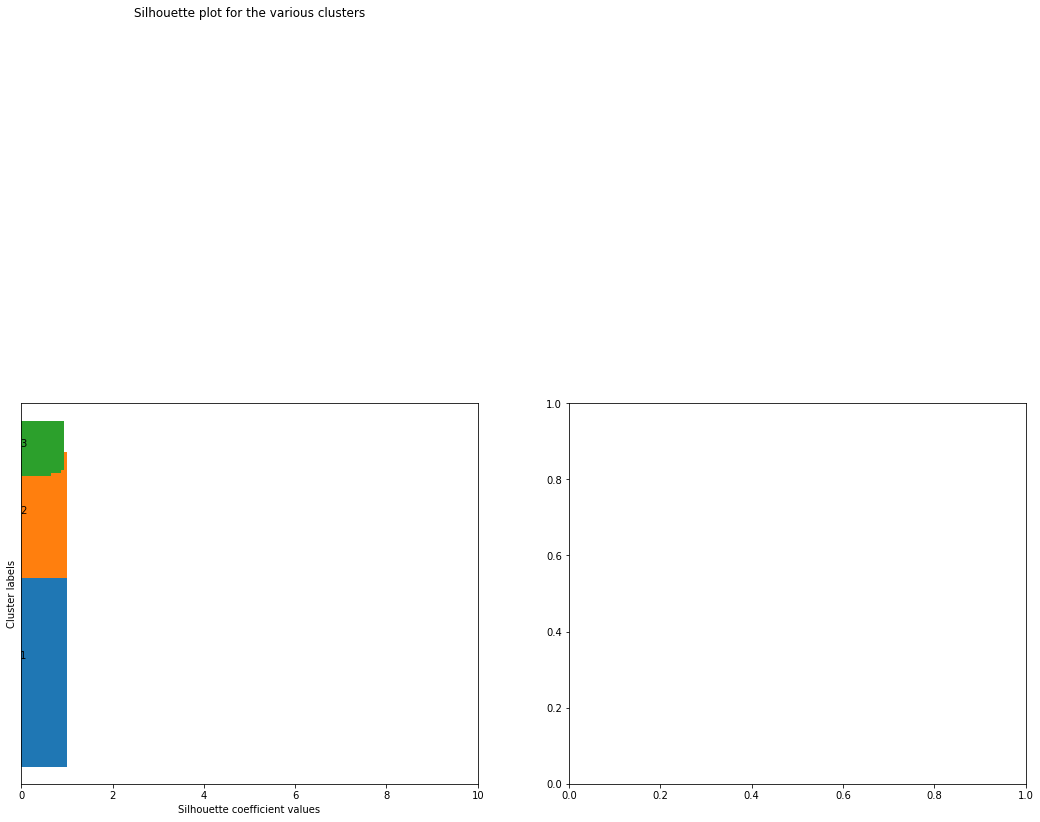

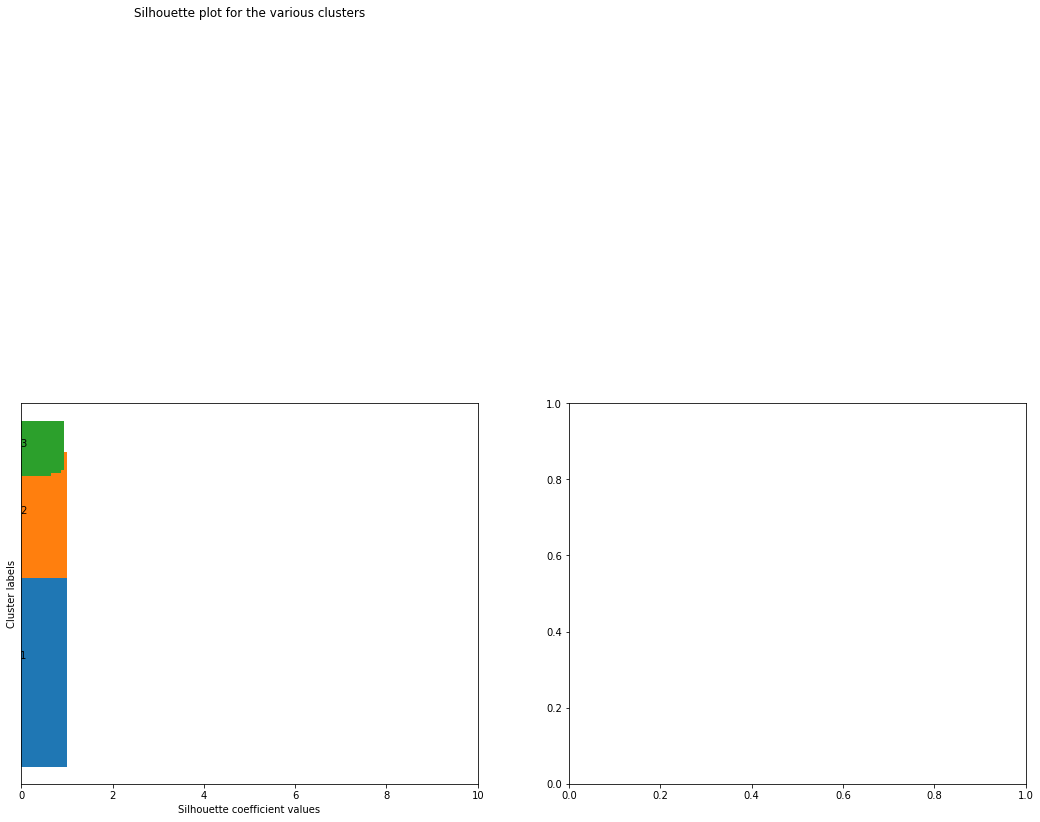

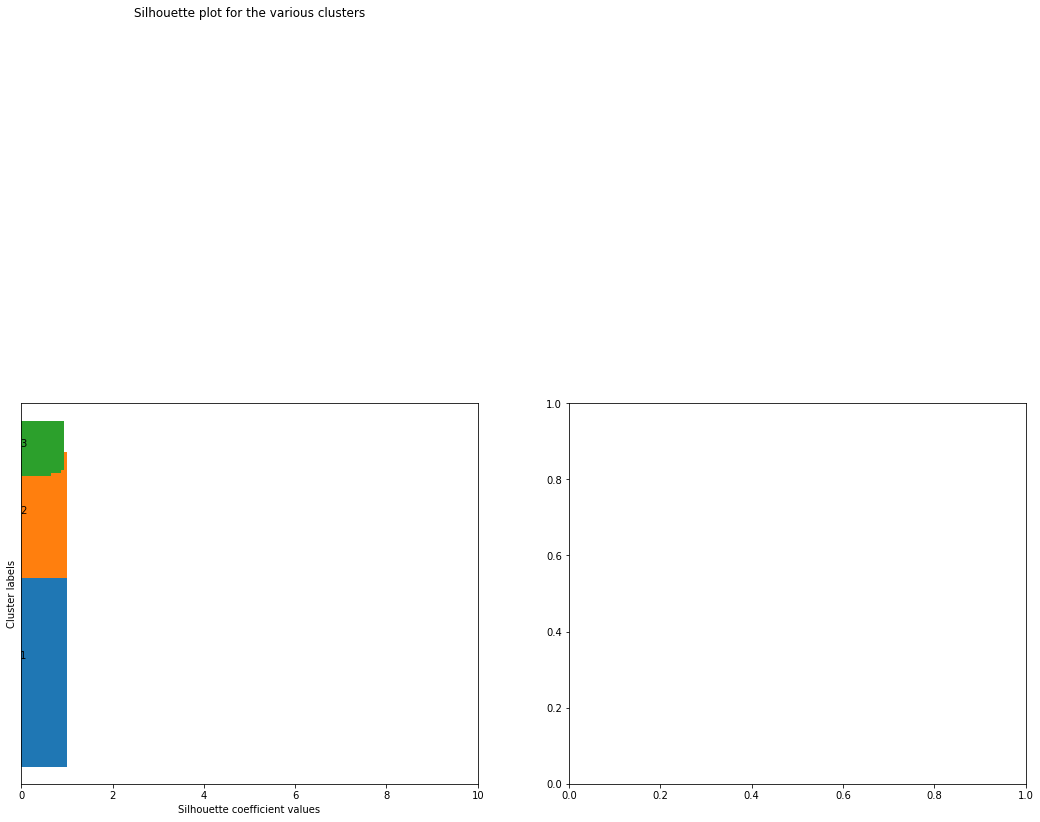

In [62]:
for i, k in enumerate([0, 1, 2]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    

    # Get silhouette samples
    silhouette_vals = silhouette_samples(sf_clustering, kmeans.labels_)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(kmeans.labels_)):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=10)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    #ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([0, 10])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=2);
    
  



C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  


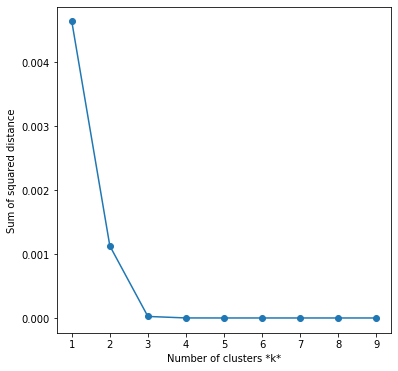

In [57]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(sf_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');